In [1]:
#connecting SQL to notebook

import mysql.connector


#connect to server

cnx = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="Savage",
    port ="3306")

query = "SELECT * FROM banking_case.customer"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


df = pd.read_sql(query, cnx)

cnx.close()


# Save DataFrame to a Pickle file
df.to_pickle('../data/interim/processed_data1.pkl')

/var/folders/1h/p19q72_n6jd160394z7mbl700000gn/T/ipykernel_76919/3925451655.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [3]:
#adjusting display settings
plt.style.use("seaborn-v0_8-deep")
plt.rcParams["figure.figsize"] = (14, 6)
plt.rcParams["figure.dpi"] = 150

European      1309
Asian          754
American       507
Australian     254
African        176
Name: Nationality, dtype: int64


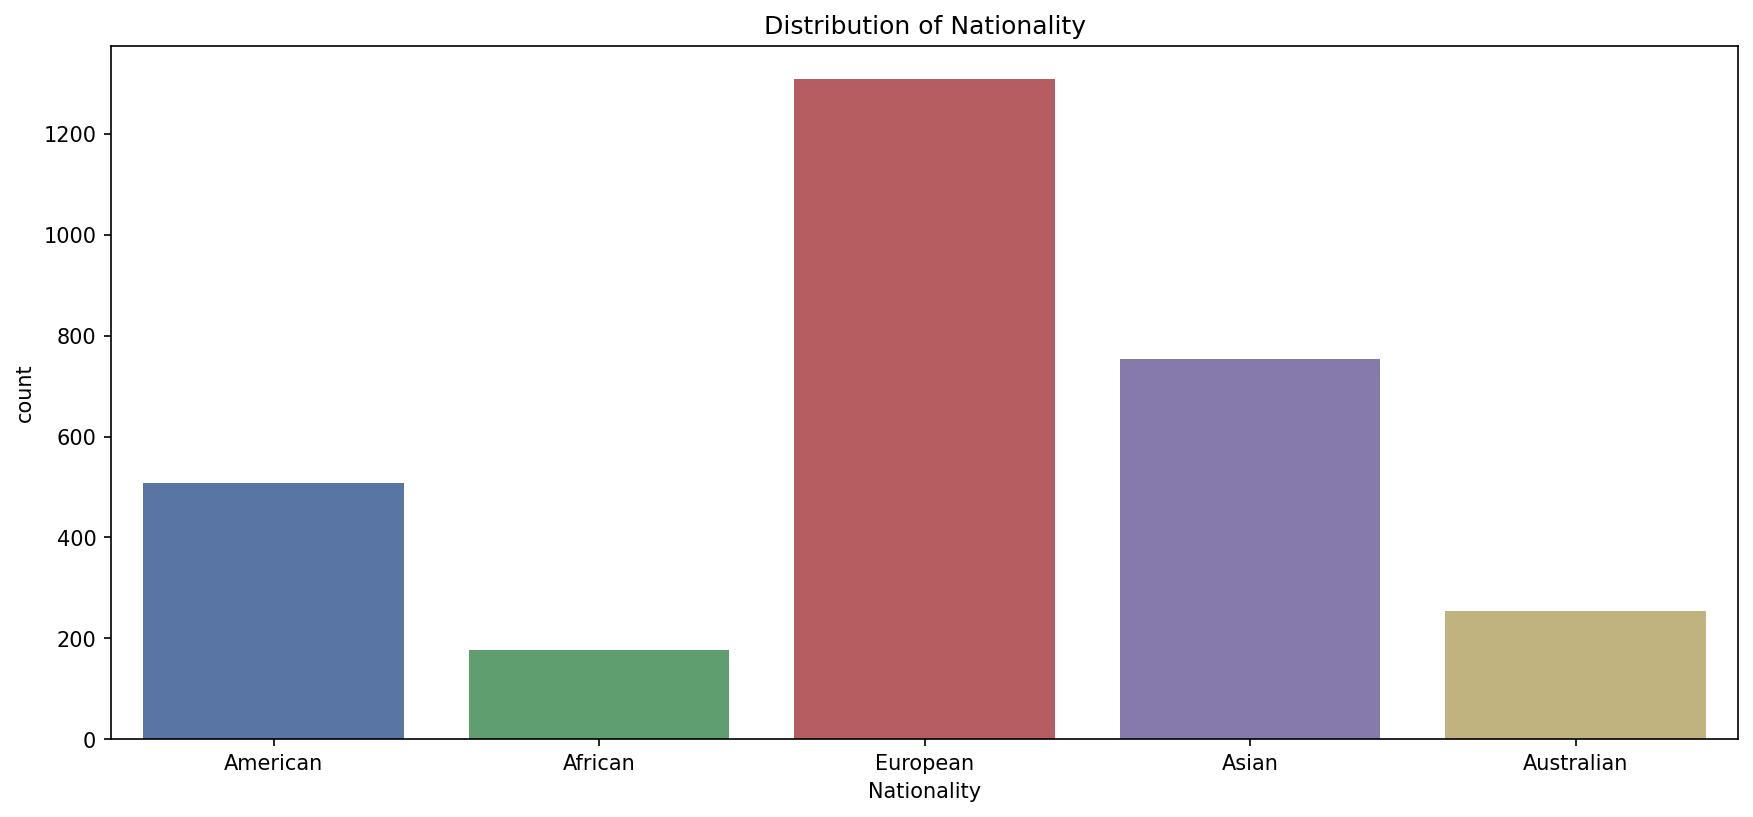

Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: Occupation, Length: 195, dtype: int64


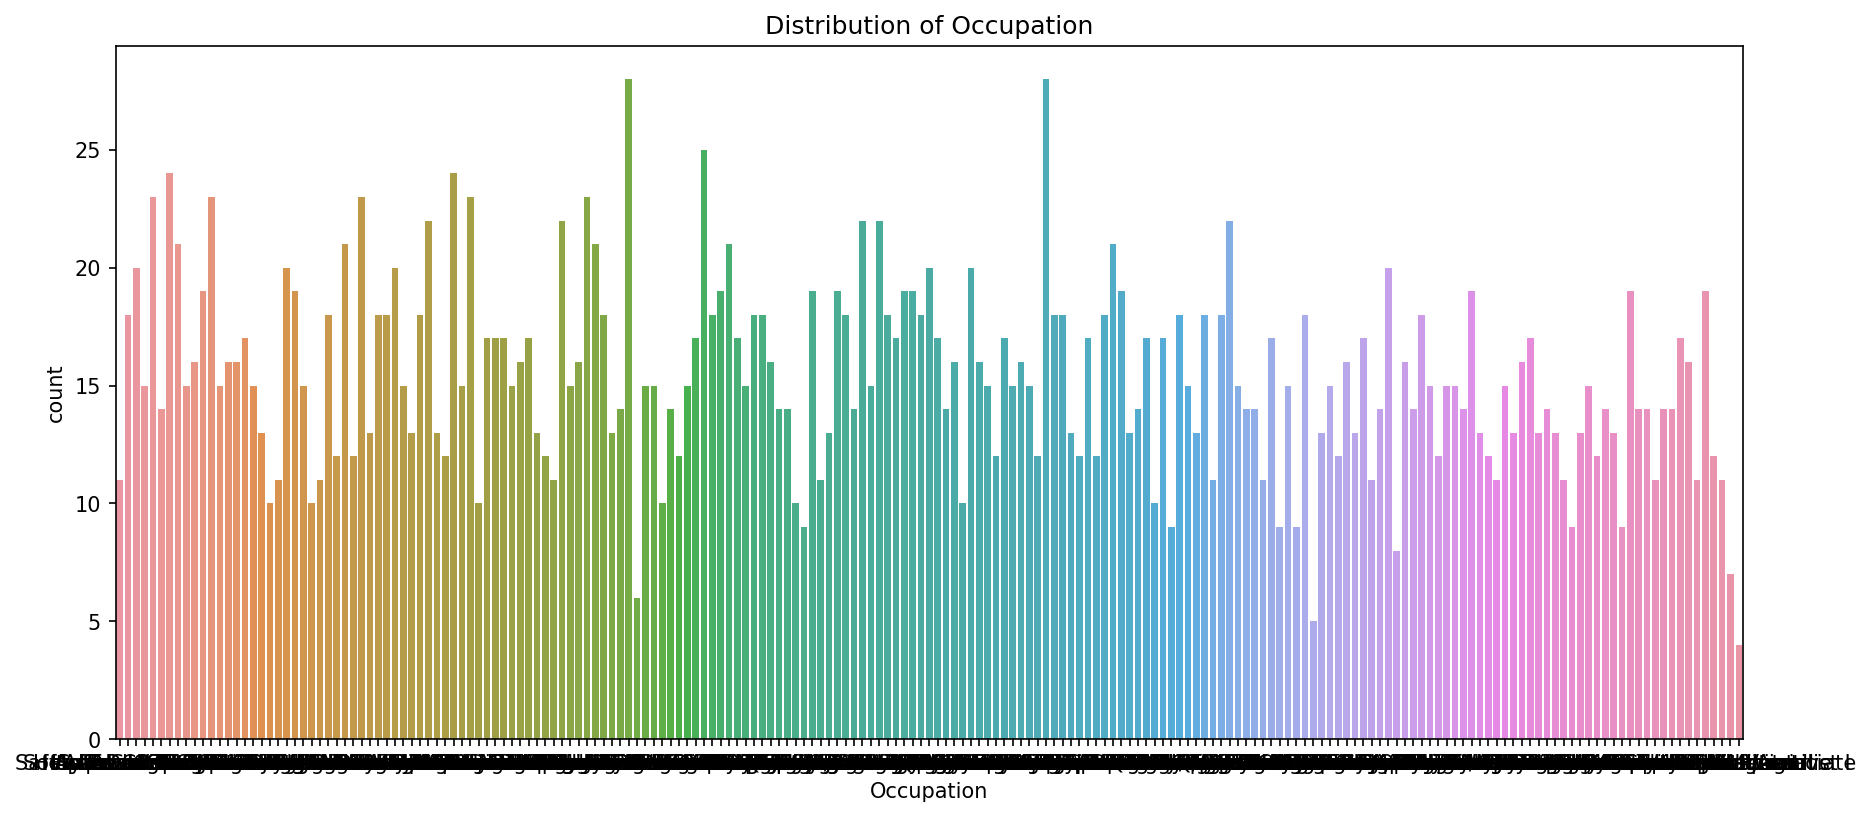

High    1476
Mid      962
Low      562
Name: Fee Structure, dtype: int64


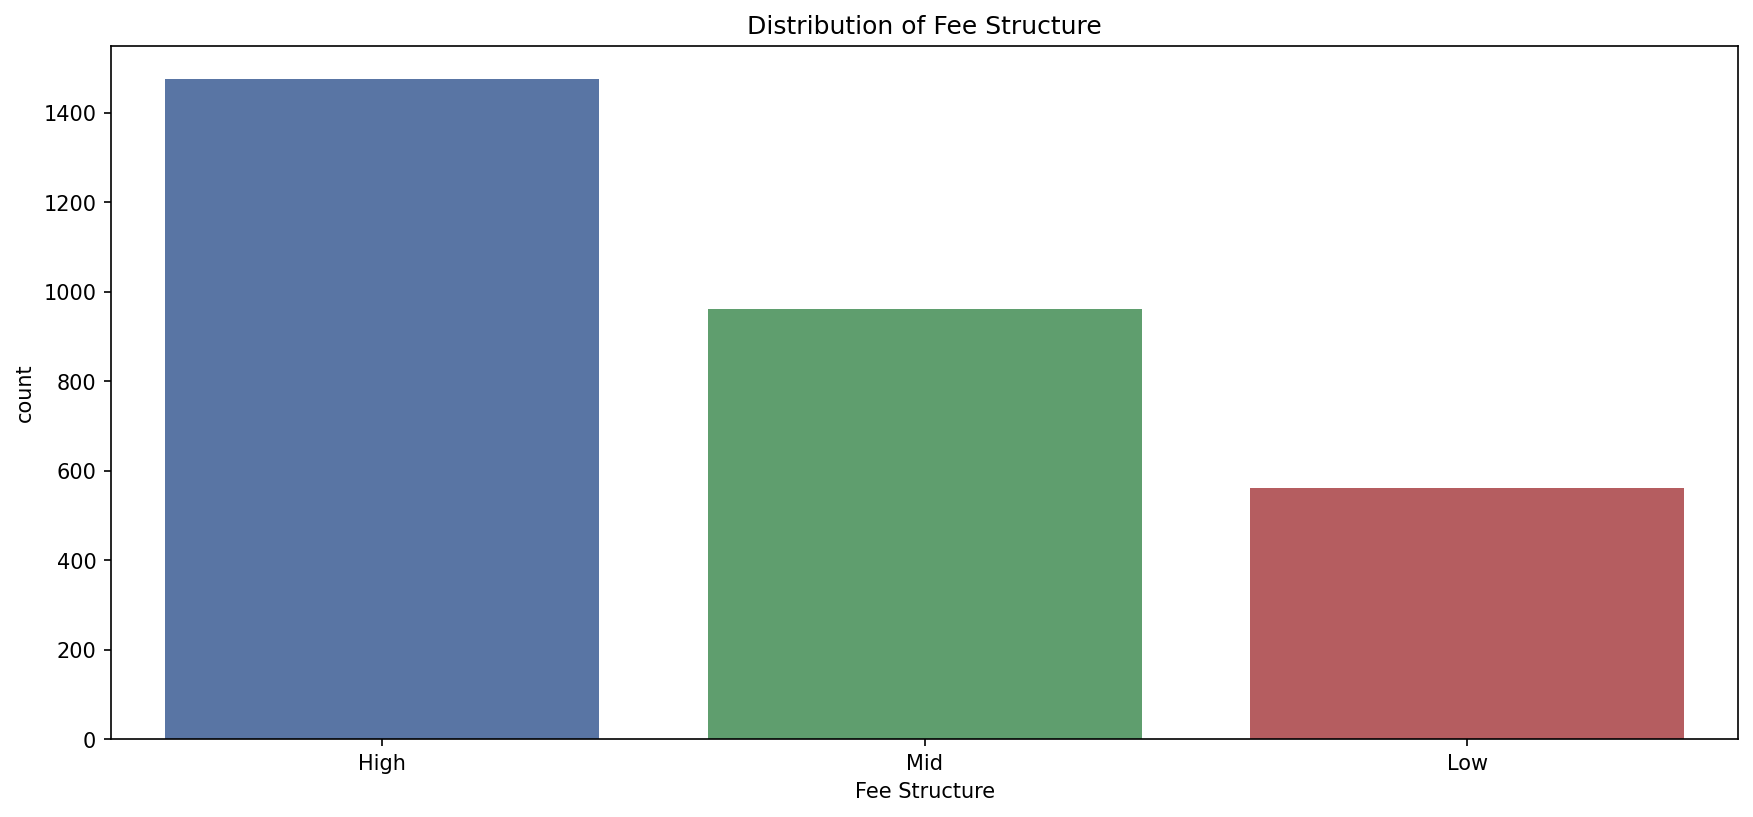

Jade        1331
Silver       767
Gold         585
Platinum     317
Name: Loyalty Classification, dtype: int64


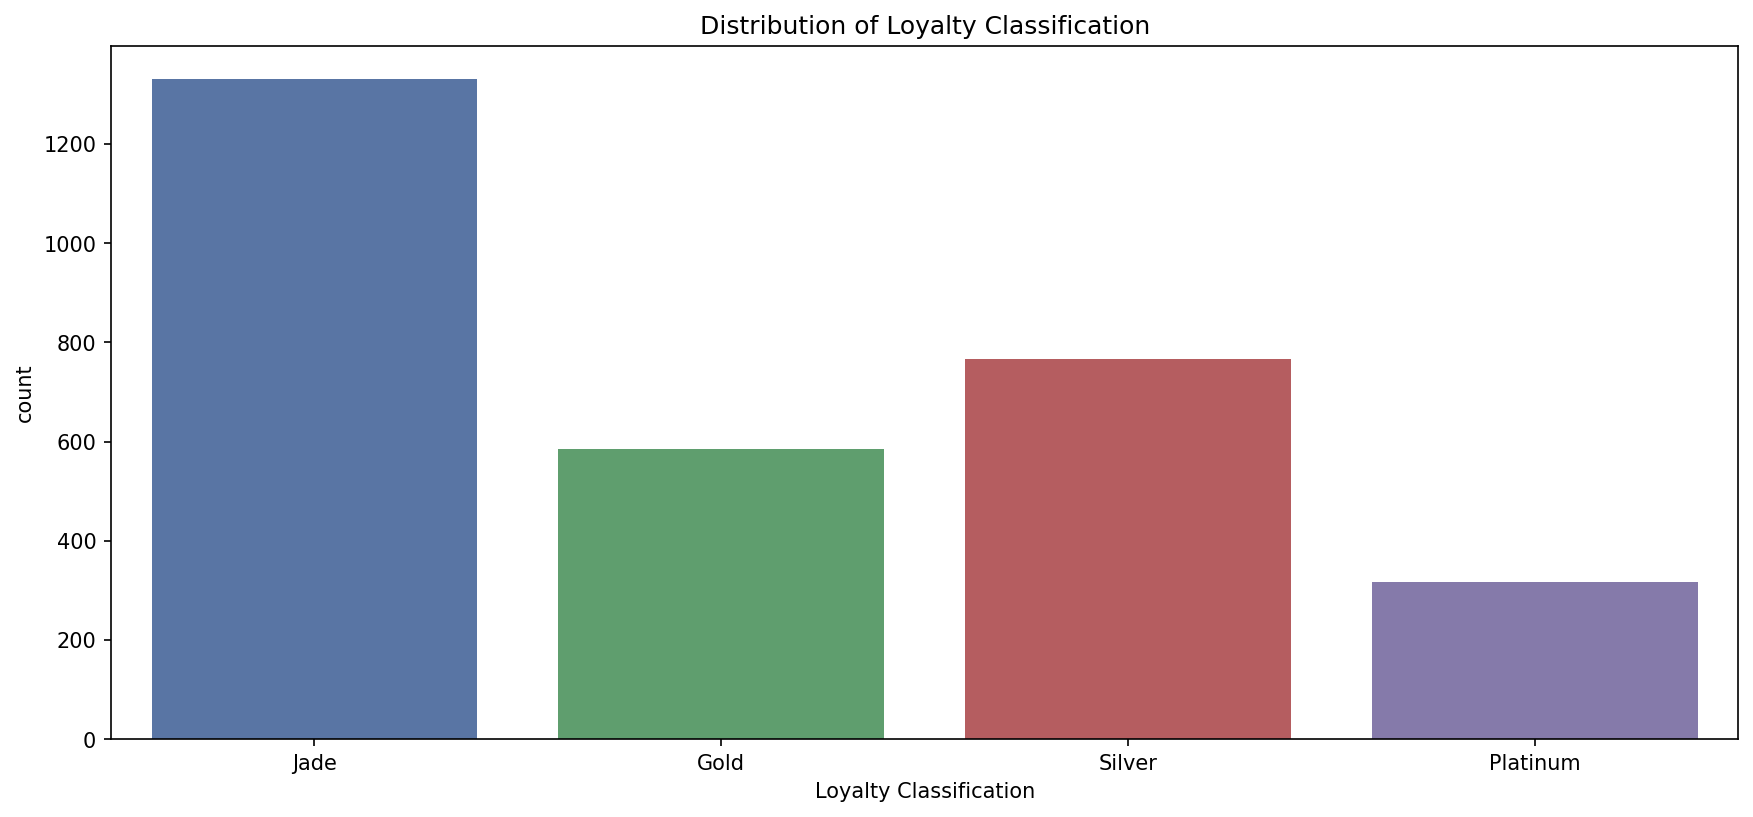

2    1512
1    1488
Name: GenderId, dtype: int64


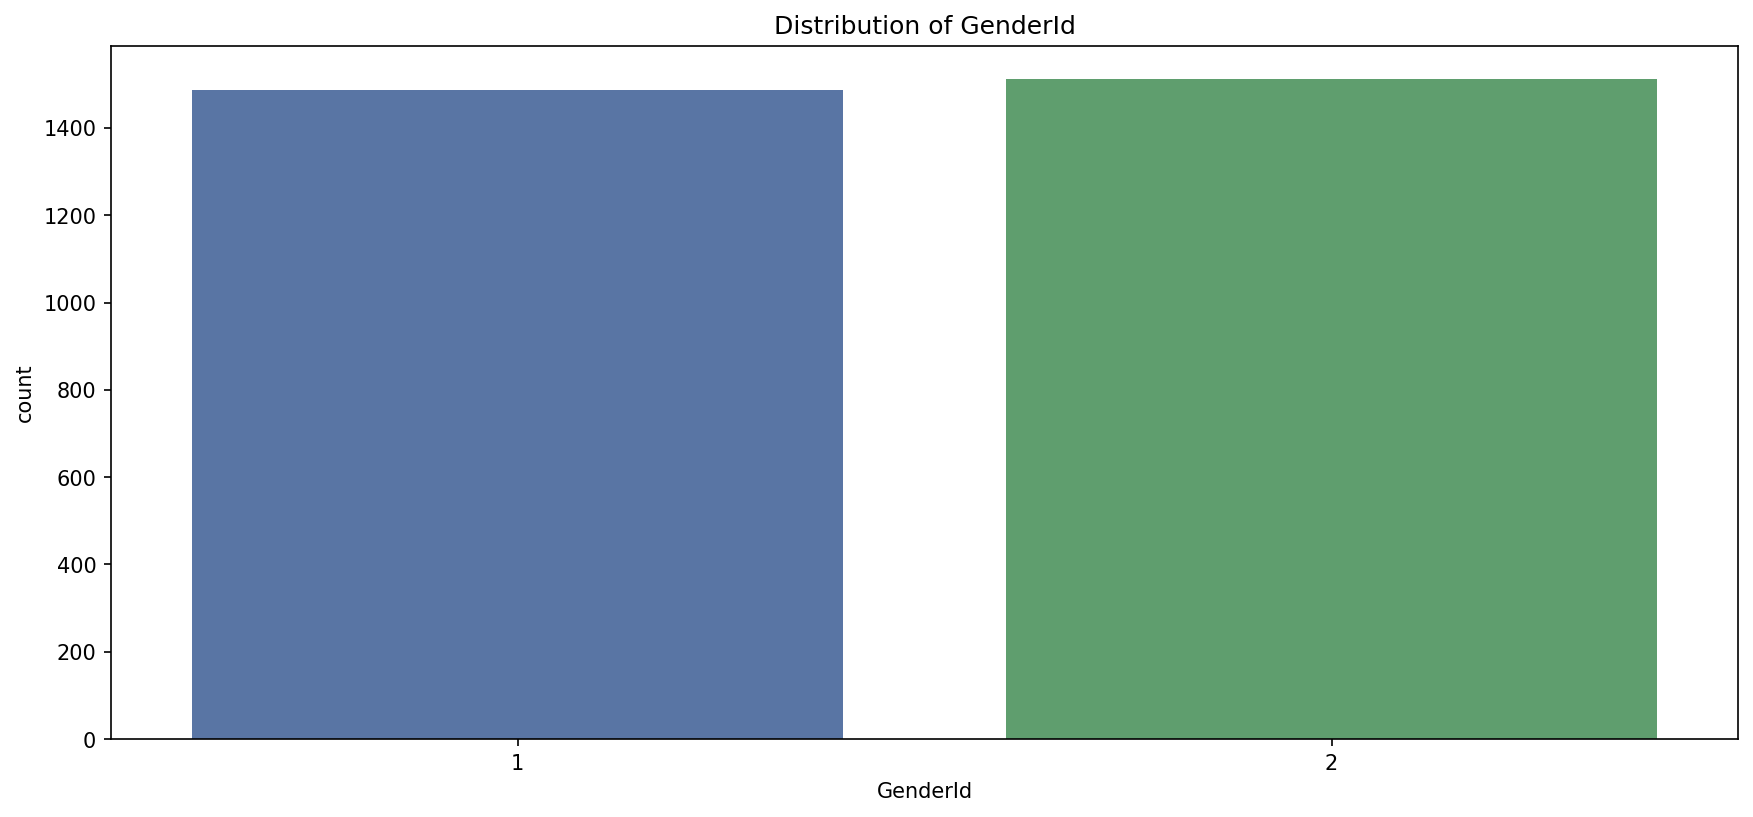

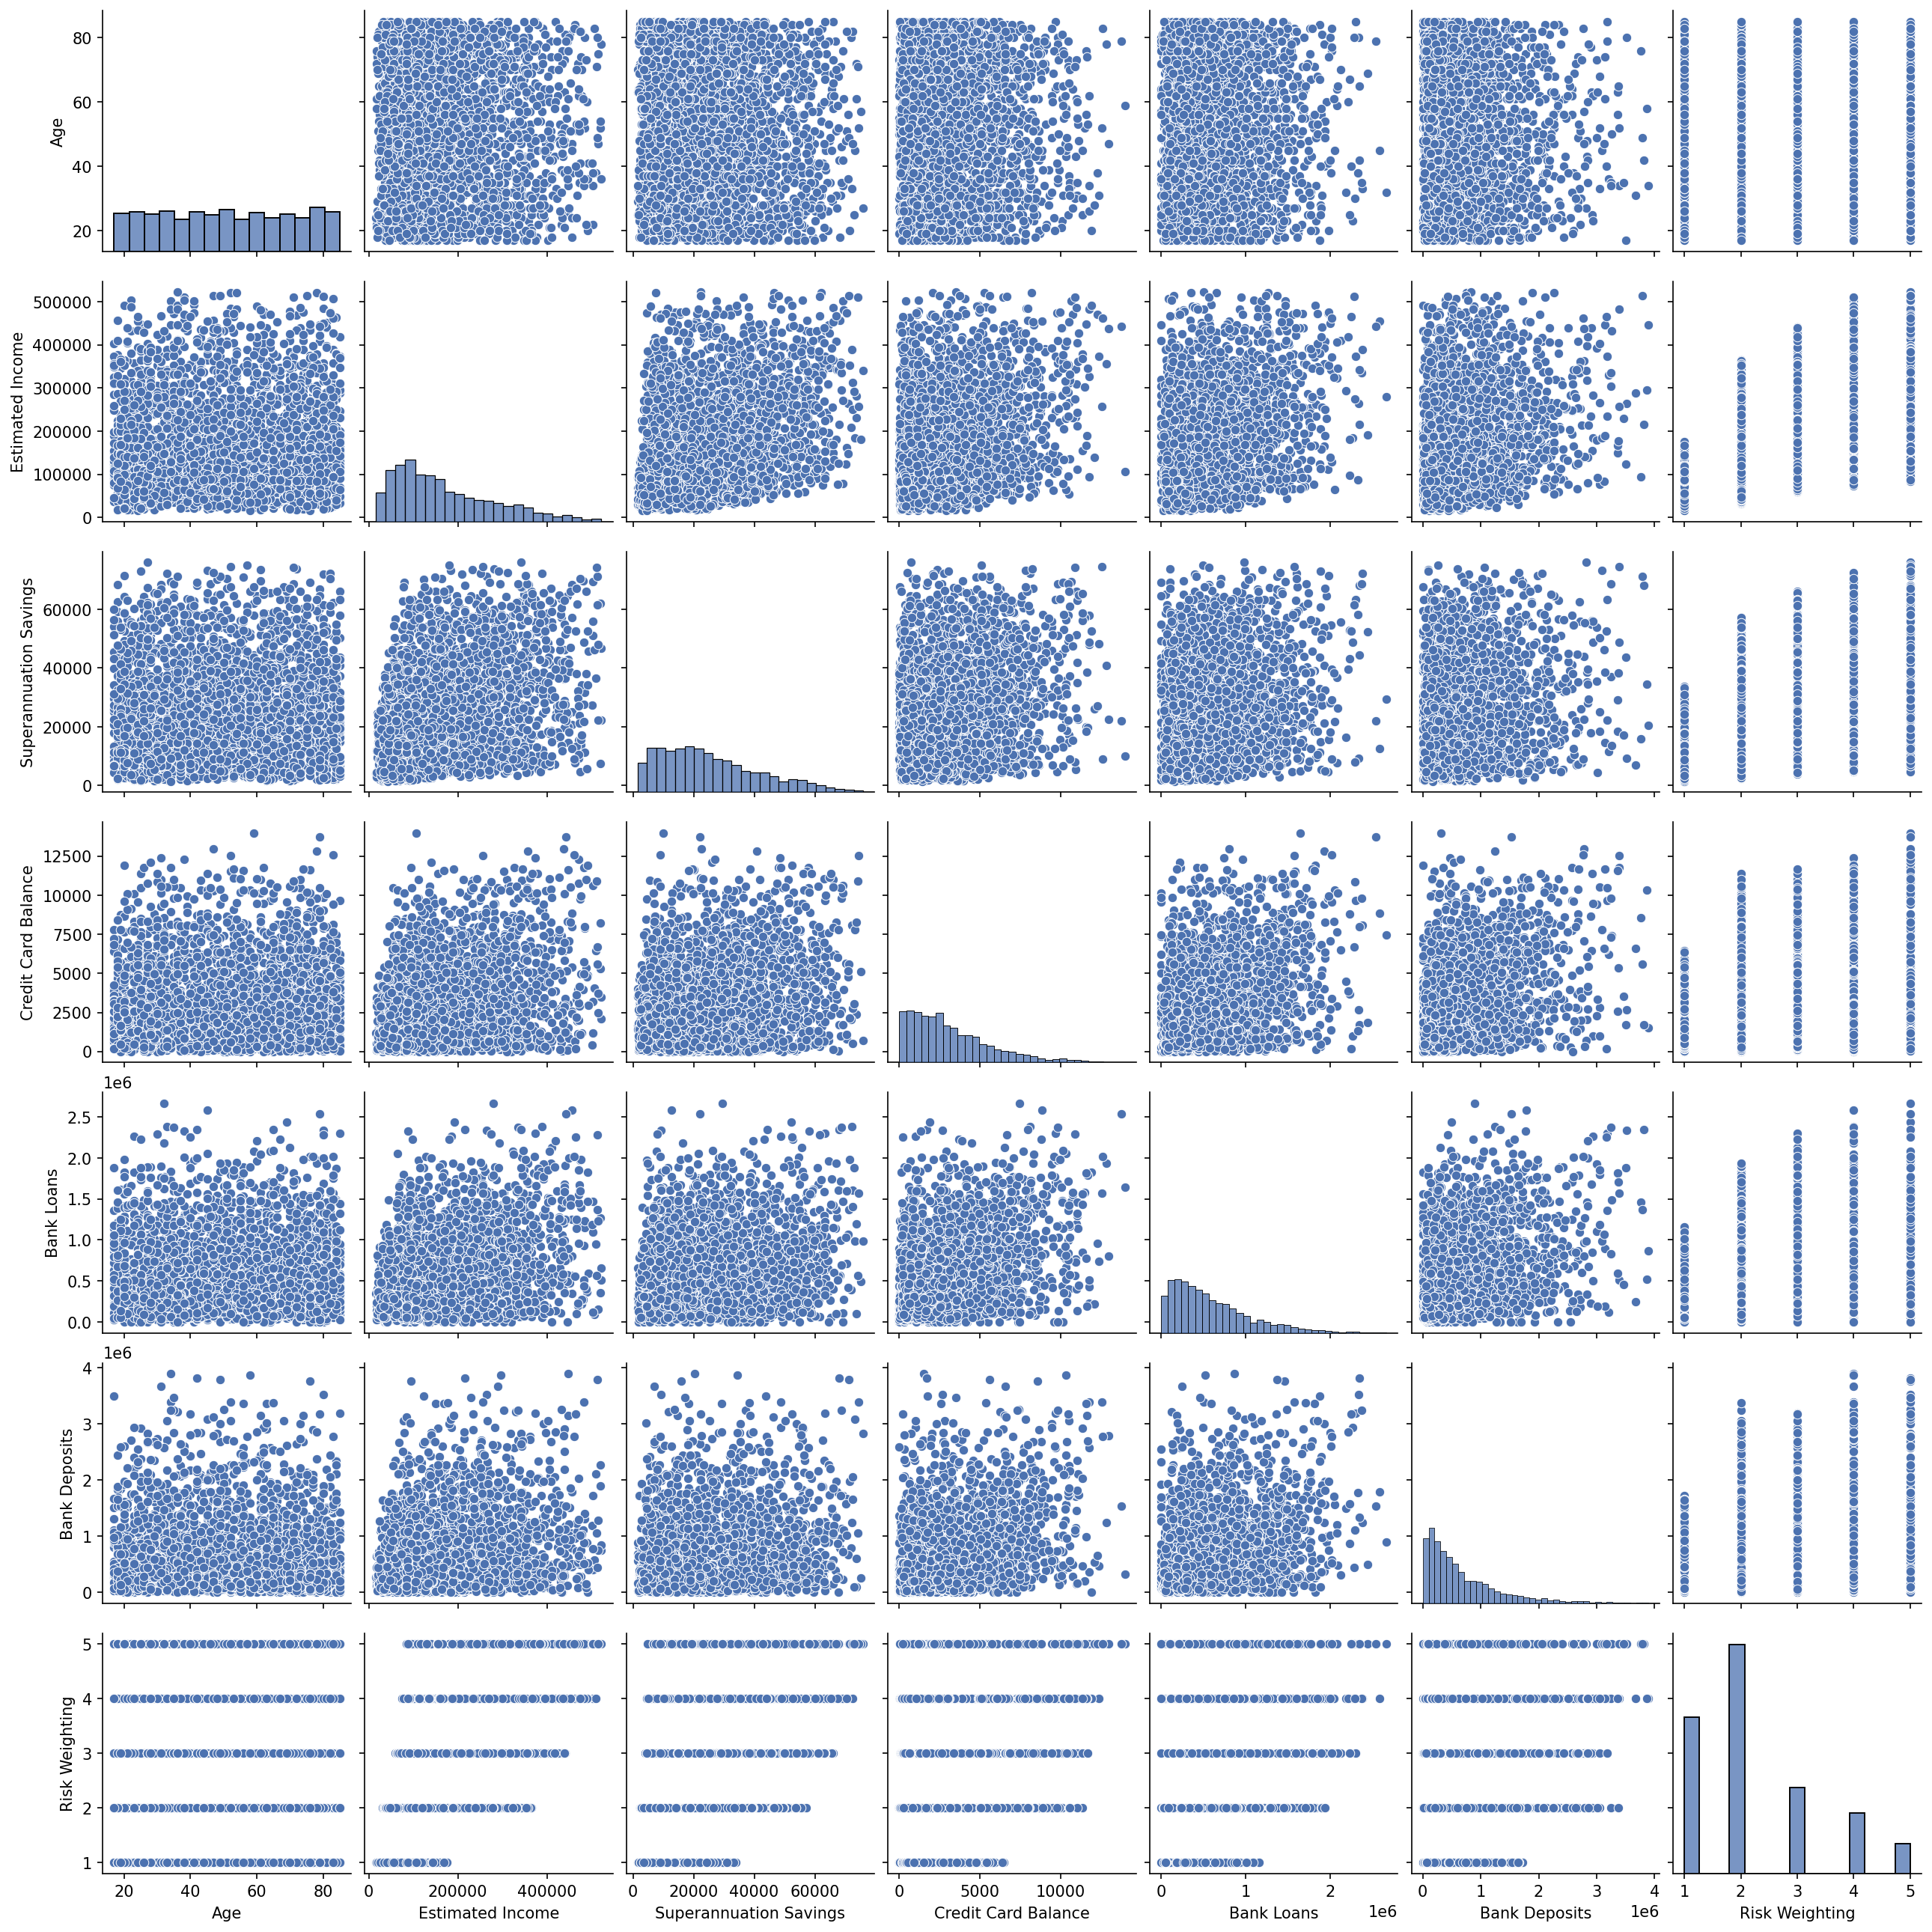

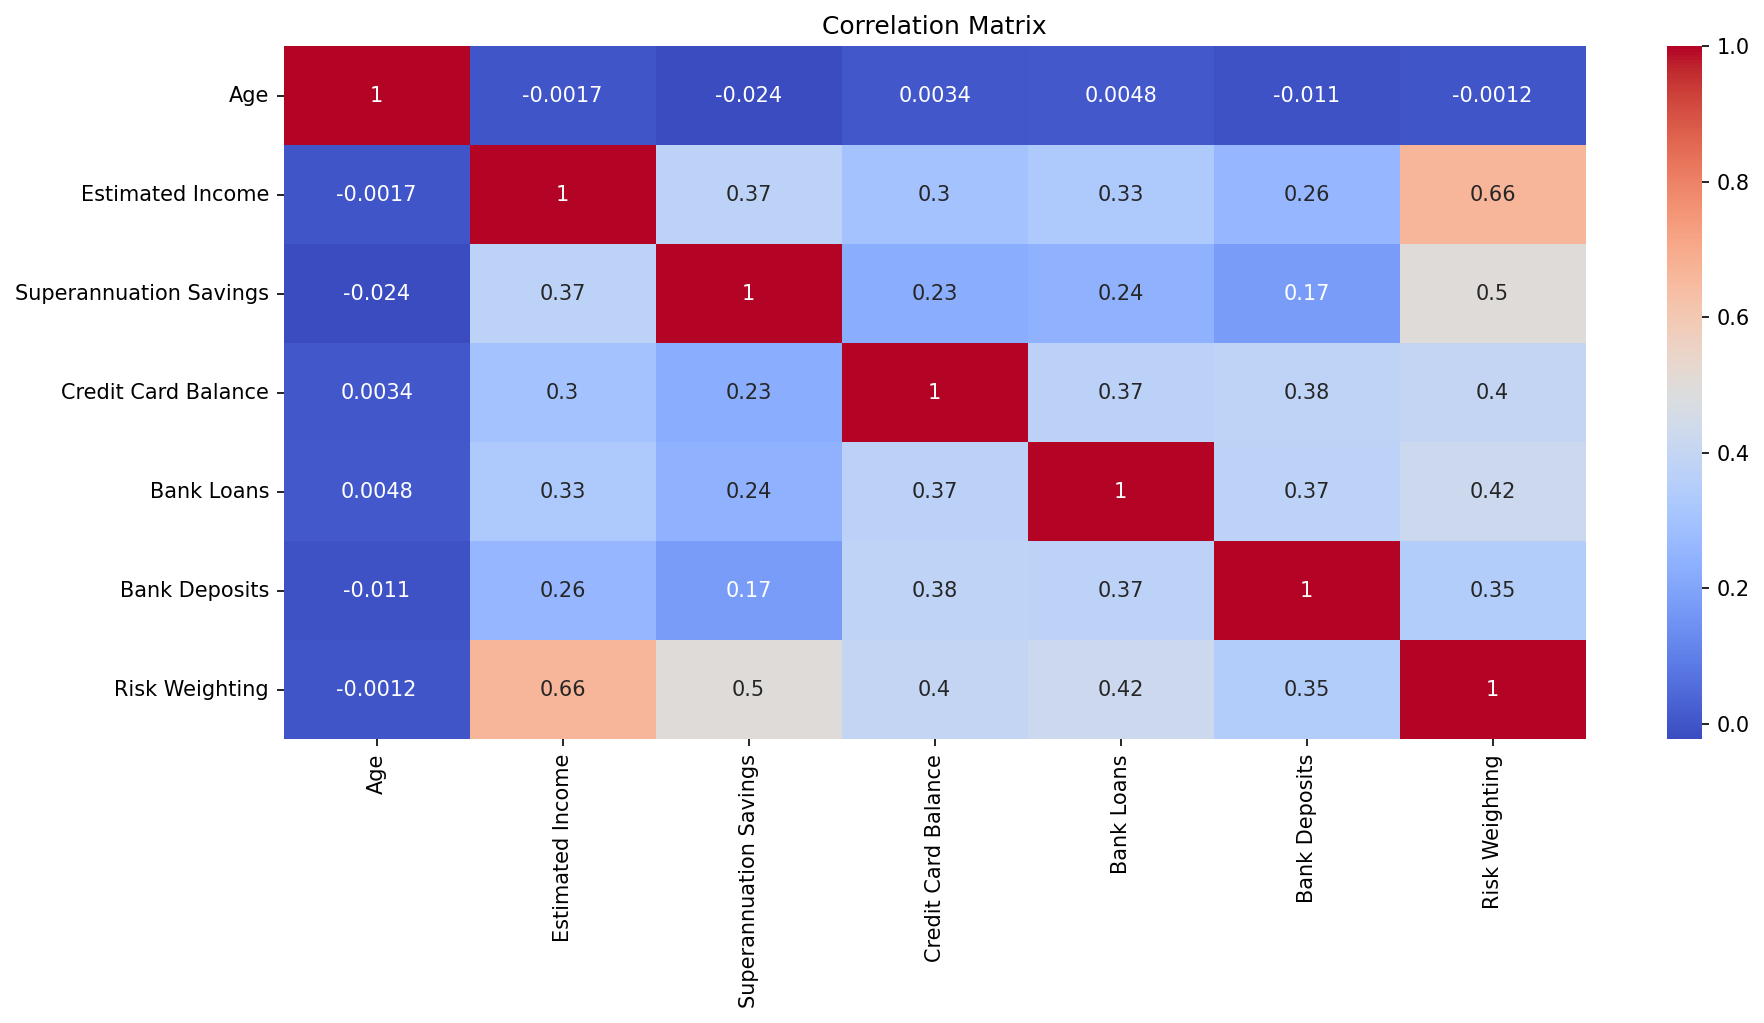

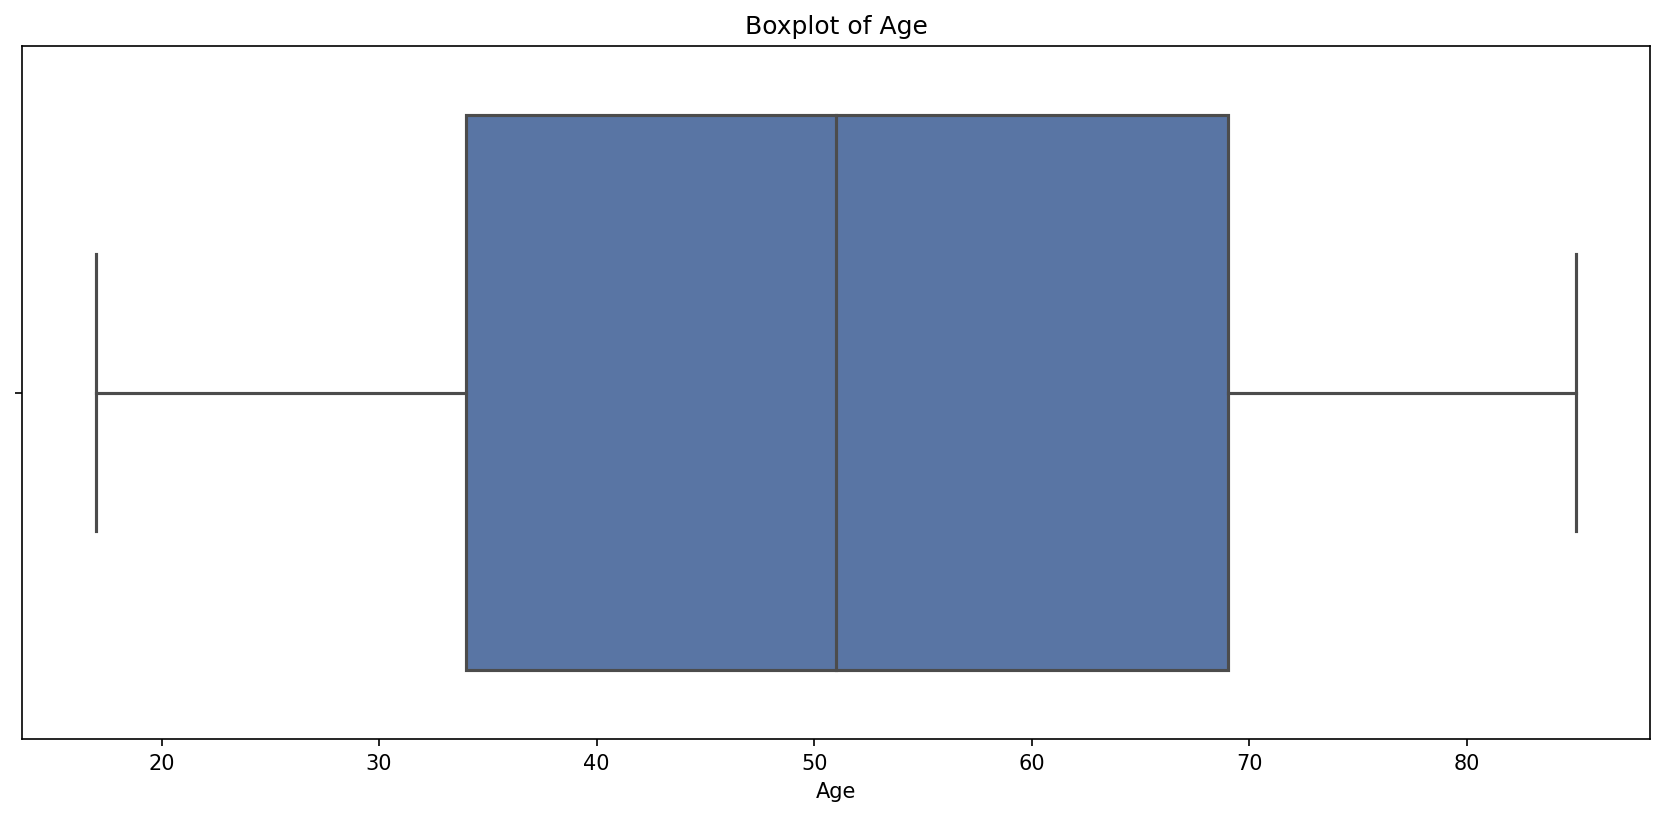

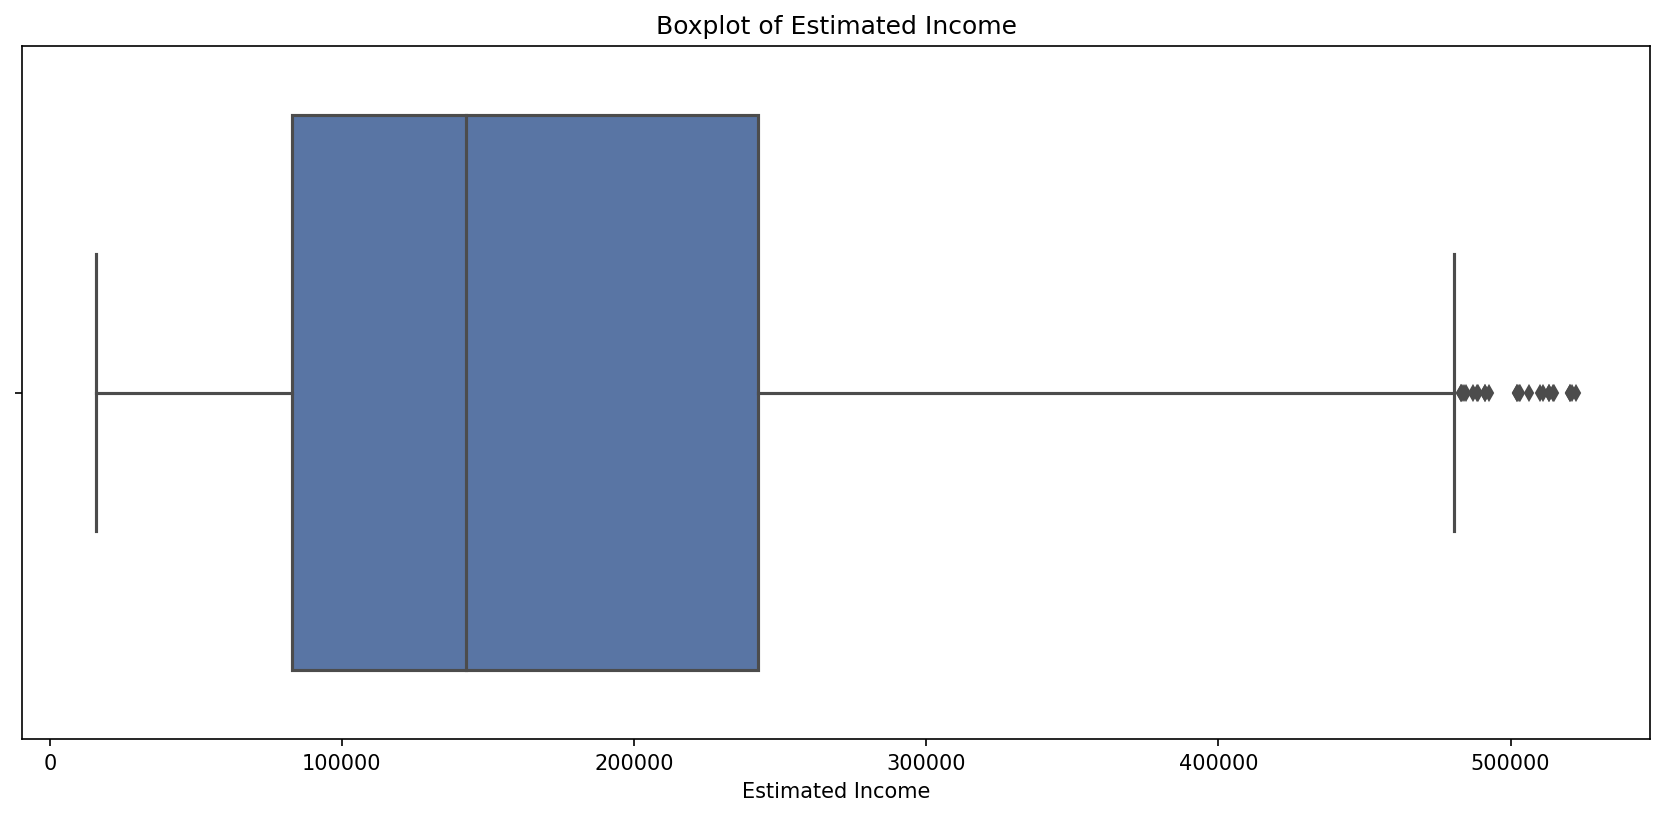

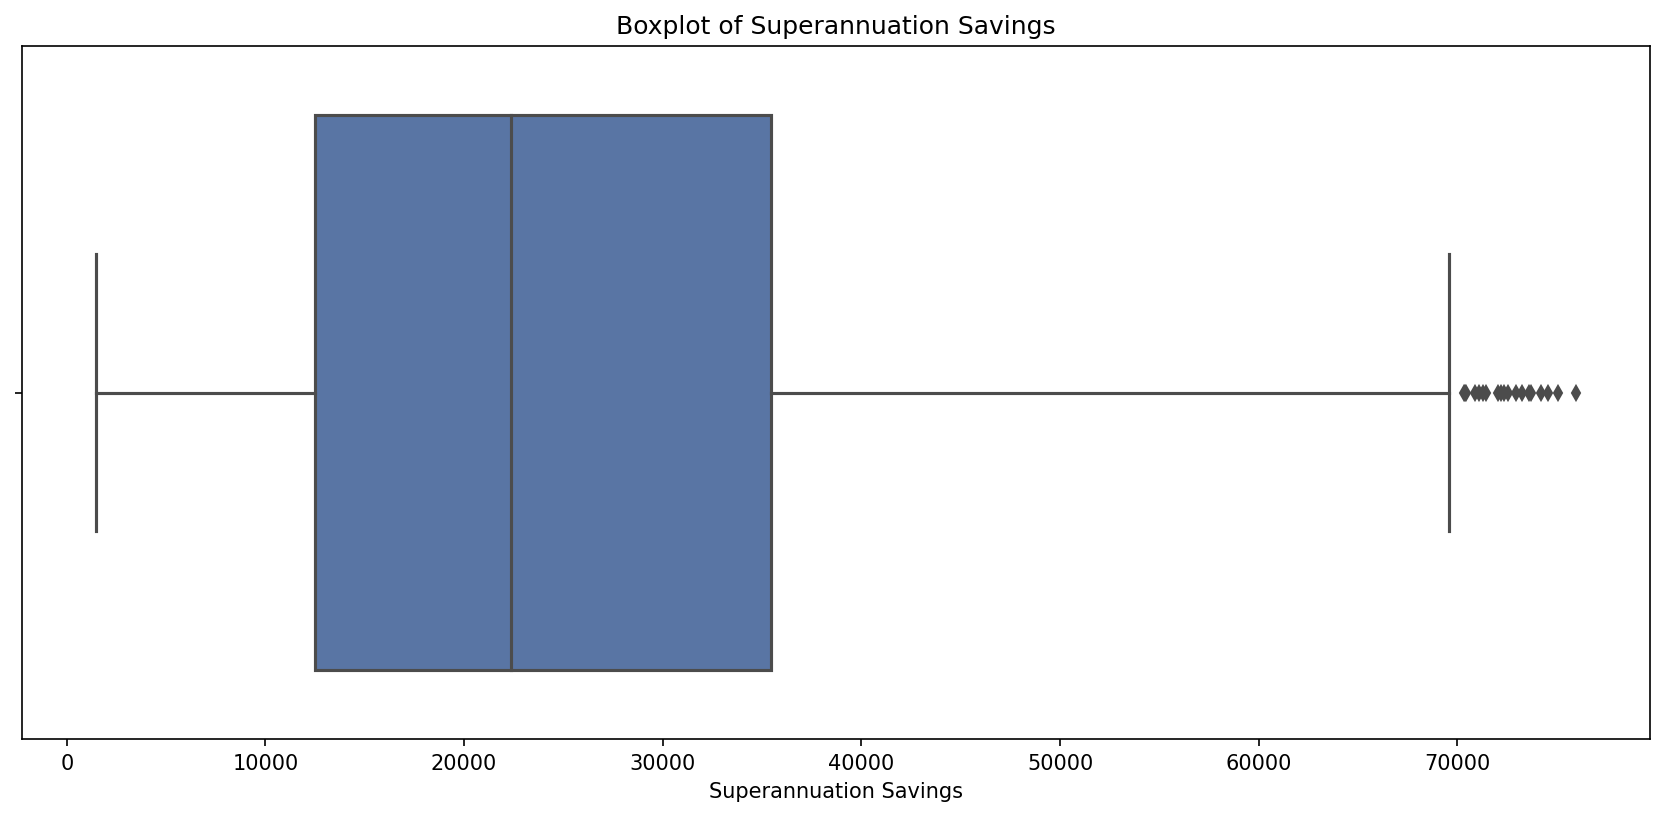

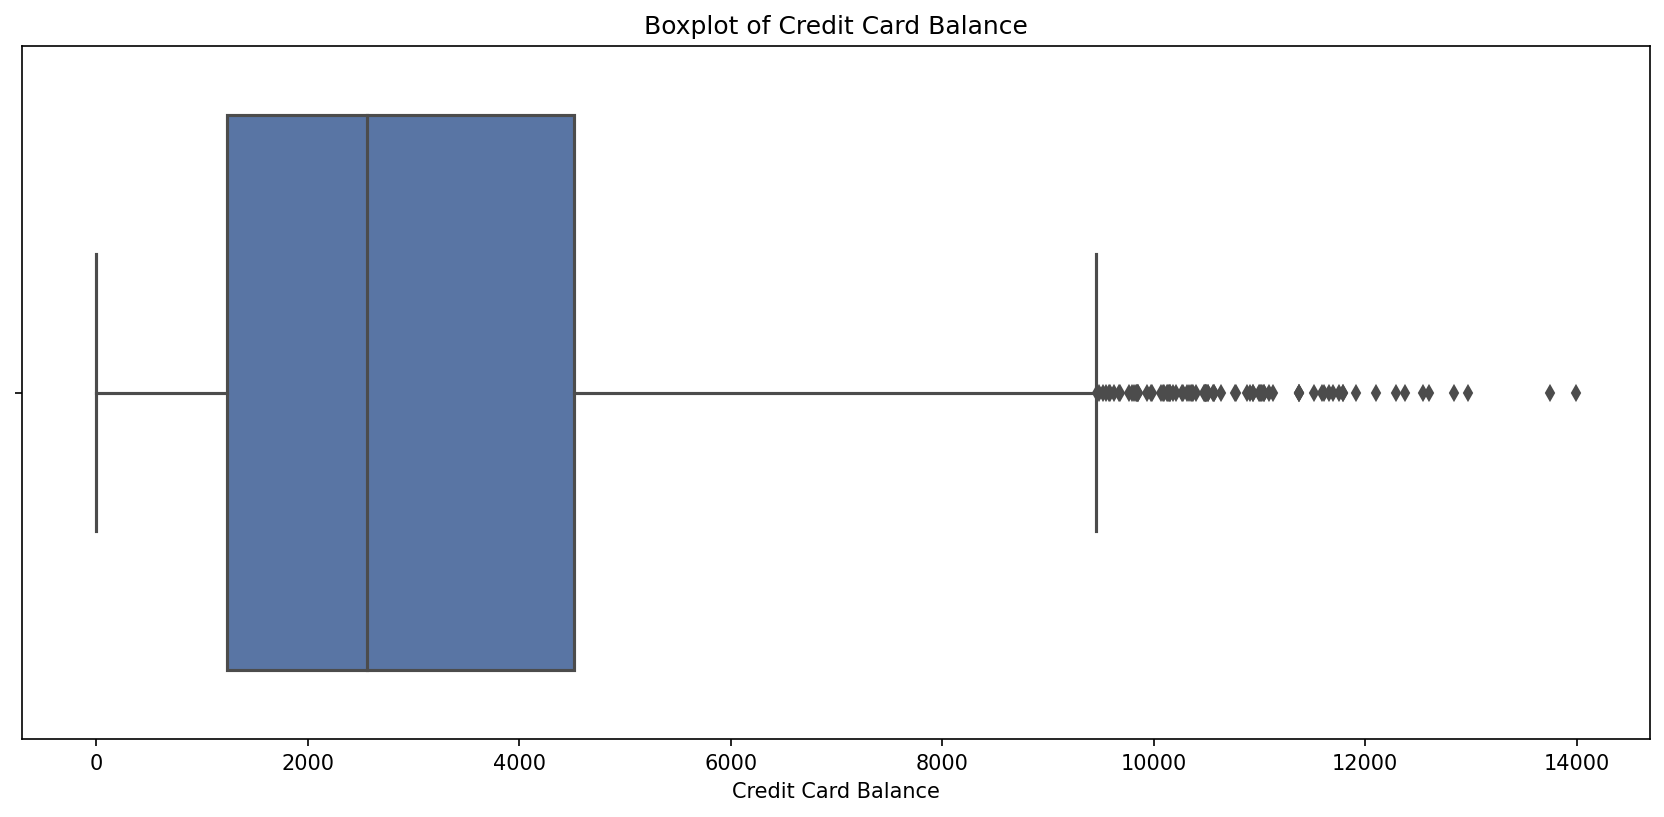

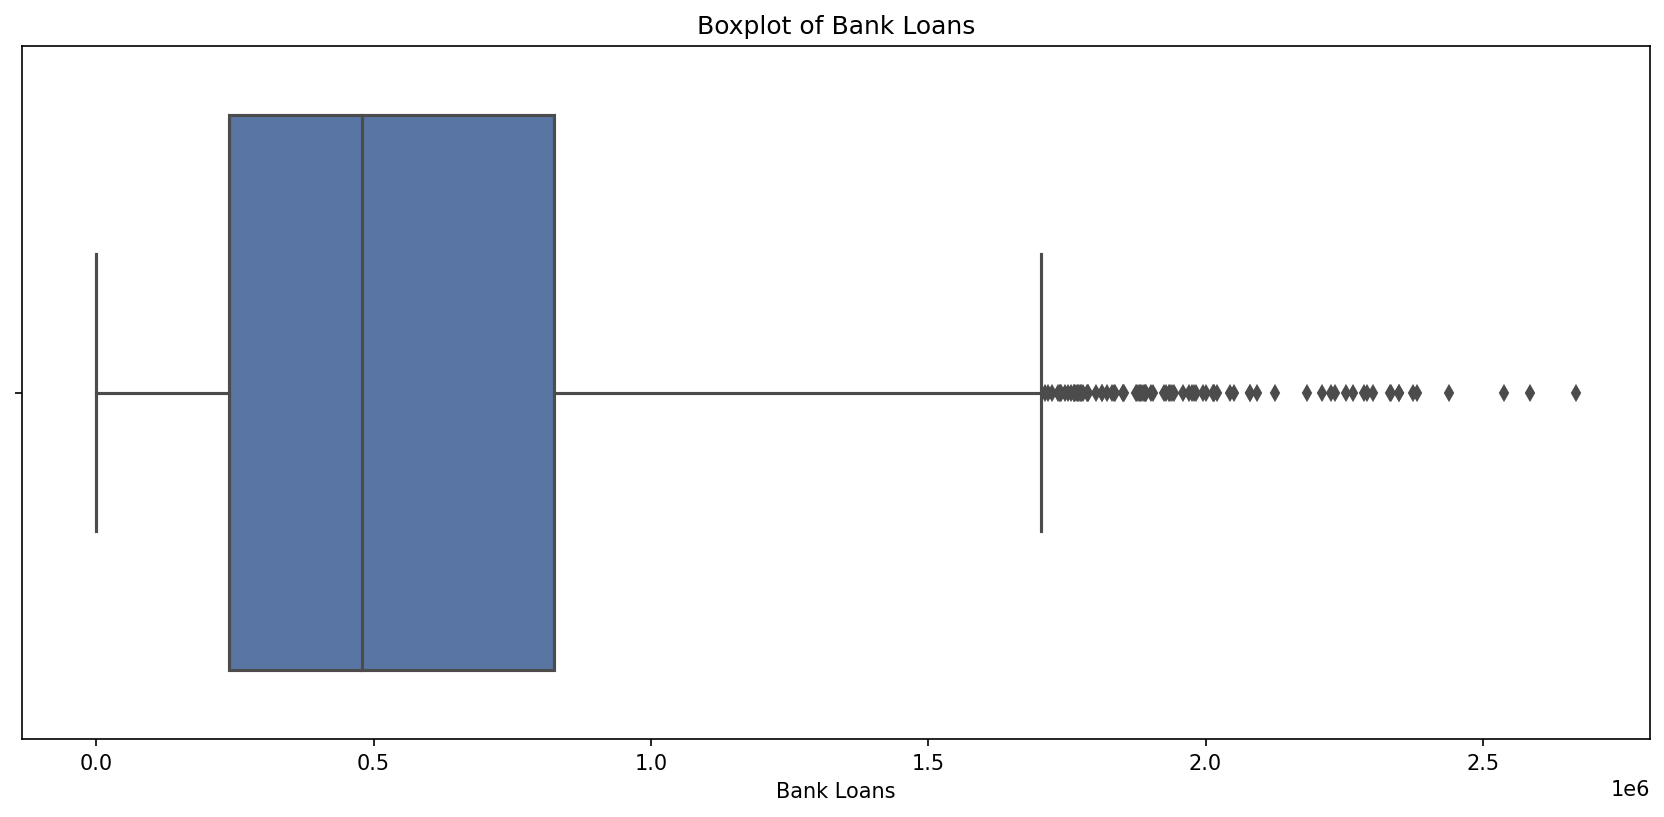

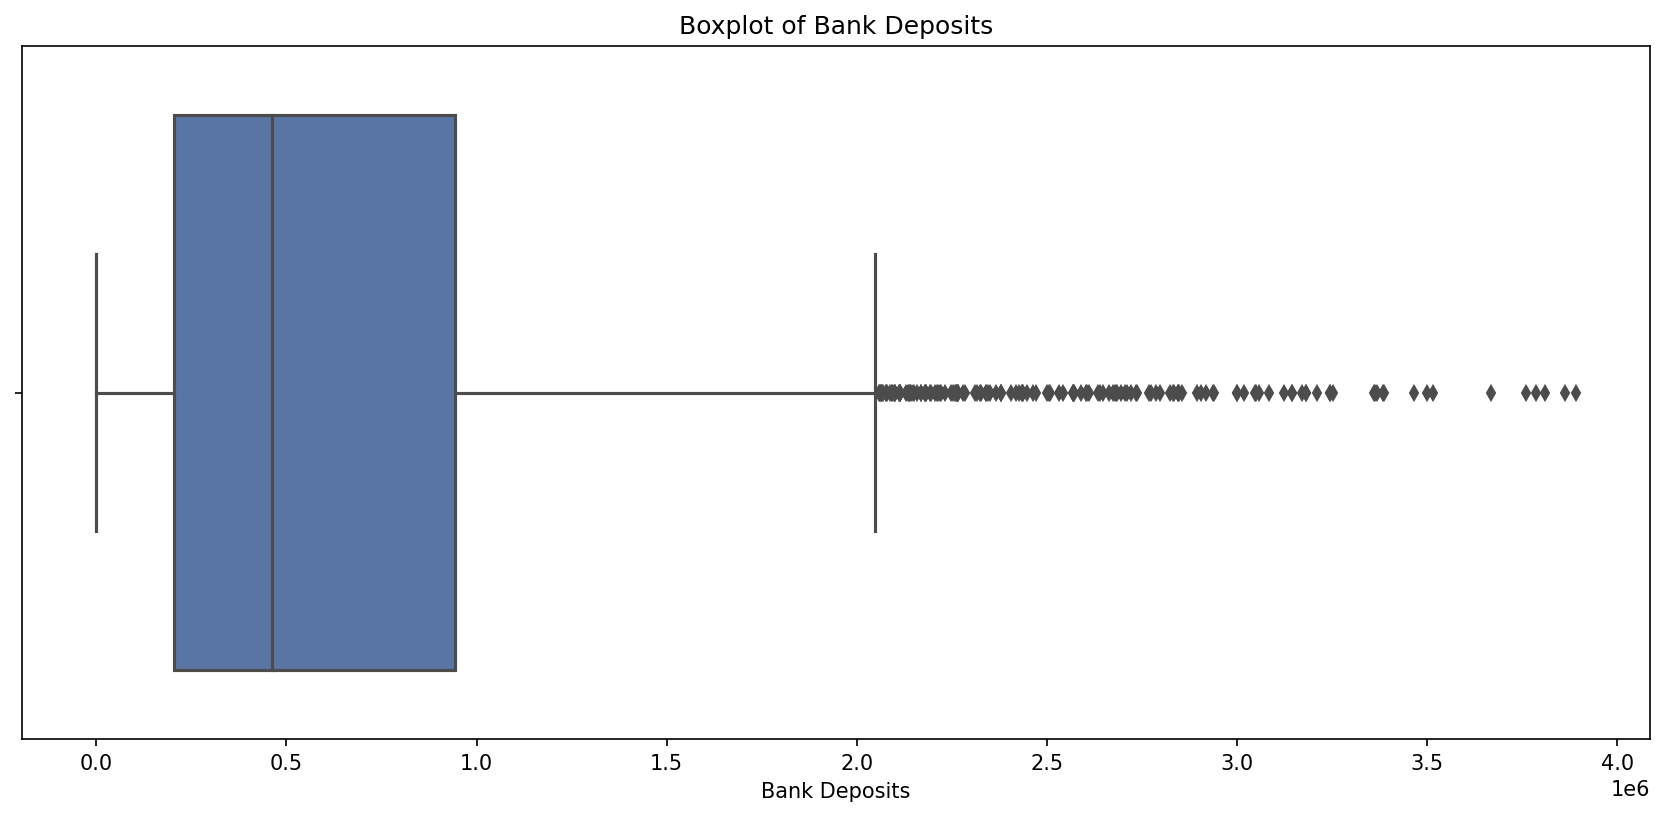

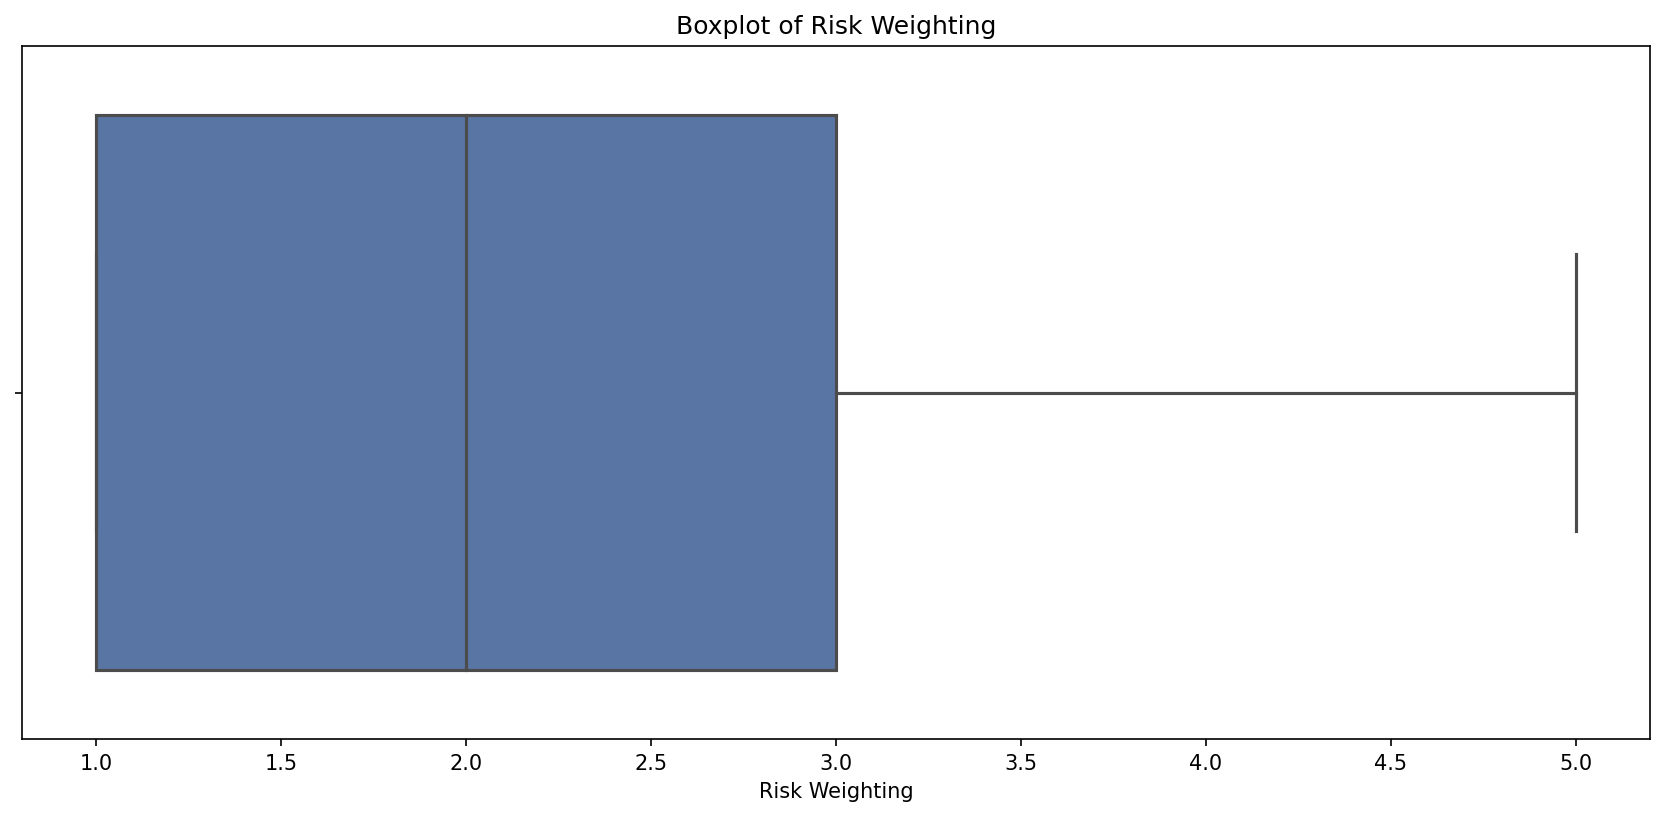

In [4]:
# Handle missing values (if any)
df.isnull().sum()  # Check
df = df.dropna()  # Or impute if needed, e.g., df['Age'].fillna(df['Age'].median(), inplace=True)

# Categorical analysis
categorical_cols = ['Nationality', 'Occupation', 'Fee Structure', 'Loyalty Classification', 'GenderId']  # Example
for col in categorical_cols:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Numerical analysis
numerical_cols = ['Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Risk Weighting']
sns.pairplot(df[numerical_cols])
plt.show()

# Correlation heatmap
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Outliers detection (boxplots)
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
# Insight: Remove outliers, e.g., df = df[df['Risk Weighting'] < df['Risk Weighting'].quantile(0.99)]

# Insights:
# - Age distribution: Mostly 20-80, skew towards older customers – older customers may have higher deposits but lower risk.
# - Income vs. Risk: Higher income correlates negatively with risk weighting (safer profiles).
# - Nationality: Dominated by European/American – potential bias in risk models.
# - High correlations: Bank Deposits and Savings strongly correlated; consider multicollinearity.
# - Target (Risk Weighting): Mean ~X, std ~Y; right-skewed, may need log-transform for regression.

# Save cleaned data
df.to_csv('../data/processed/cleaned_banking.csv', index=False)